In [1]:
!pip install requests pandas

In [3]:
!pip install requests

In [5]:
# Import necessary libraries
import requests  # For API requests
import json  # For handling JSON data

# Weather API details
api_key = '8298a945594d47c0993140604241110'
city = 'Nairobi'

# Fetch weather data
url = f"http://api.weatherapi.com/v1/current.json?key={api_key}&q={city}&aqi=no"
response = requests.get(url)

# Convert the response to JSON
data = response.json()

# Display collected data in formatted JSON
print(json.dumps(data, indent=4))


{
    "location": {
        "name": "Nairobi",
        "region": "Nairobi Area",
        "country": "Kenya",
        "lat": -1.2833,
        "lon": 36.8167,
        "tz_id": "Africa/Nairobi",
        "localtime_epoch": 1728655942,
        "localtime": "2024-10-11 17:12"
    },
    "current": {
        "last_updated_epoch": 1728655200,
        "last_updated": "2024-10-11 17:00",
        "temp_c": 25.3,
        "temp_f": 77.5,
        "is_day": 1,
        "condition": {
            "text": "Partly cloudy",
            "icon": "//cdn.weatherapi.com/weather/64x64/day/116.png",
            "code": 1003
        },
        "wind_mph": 12.5,
        "wind_kph": 20.2,
        "wind_degree": 123,
        "wind_dir": "ESE",
        "pressure_mb": 1021.0,
        "pressure_in": 30.15,
        "precip_mm": 0.0,
        "precip_in": 0.0,
        "humidity": 36,
        "cloud": 75,
        "feelslike_c": 24.7,
        "feelslike_f": 76.5,
        "windchill_c": 25.6,
        "windchill_f": 78.0,
   

In [6]:
import pandas as pd

# Create a DataFrame from the API response
weather_data = pd.DataFrame([{
    'city': data['location']['name'],
    'temperature': data['current']['temp_c'],
    'humidity': data['current']['humidity'],
    'wind_speed': data['current']['wind_kph'],
    'timestamp': data['location']['localtime']
}])

# Save to CSV
weather_data.to_csv('weather_data.csv', mode='a', header=False, index=False)
print("Data saved to CSV")

Data saved to CSV


In [7]:
import sqlite3

# Connect to SQLite database (or create it)
conn = sqlite3.connect('weather_data.db')
cursor = conn.cursor()

# Create table (only run this once)
cursor.execute('''CREATE TABLE IF NOT EXISTS weather_data
                  (city TEXT, temperature REAL, humidity REAL, wind_speed REAL, timestamp TEXT)''')

# Insert data
cursor.execute("INSERT INTO weather_data VALUES (?, ?, ?, ?, ?)", 
               (data['location']['name'], data['current']['temp_c'], 
                data['current']['humidity'], data['current']['wind_kph'], 
                data['location']['localtime']))

# Commit and close connection
conn.commit()
conn.close()
print("Data saved to SQLite")

Data saved to SQLite


In [8]:
df = pd.read_csv('weather_data.csv')
print(df.head())

Empty DataFrame
Columns: [Nairobi, 25.3, 36, 20.2, 2024-10-11 17:12]
Index: []


In [9]:
print(df.describe())

       Nairobi 25.3   36 20.2 2024-10-11 17:12
count        0    0    0    0                0
unique       0    0    0    0                0
top        NaN  NaN  NaN  NaN              NaN
freq       NaN  NaN  NaN  NaN              NaN


In [11]:
print(df.columns)

Index(['Nairobi', '25.3', '36', '20.2', '2024-10-11 17:12'], dtype='object')


In [12]:
import pandas as pd

# Example data
data = {
    'location': {
        'name': 'Nairobi',
        'localtime': '2024-10-11 17:12'
    },
    'current': {
        'temp_c': 25.3,
        'humidity': 36,
        'wind_kph': 20.2
    }
}

# Construct DataFrame with correct column names
weather_data = pd.DataFrame([{
    'city': data['location']['name'],
    'temperature': data['current']['temp_c'],
    'humidity': data['current']['humidity'],
    'wind_speed': data['current']['wind_kph'],
    'timestamp': data['location']['localtime']
}])

print(weather_data)


      city  temperature  humidity  wind_speed         timestamp
0  Nairobi         25.3        36        20.2  2024-10-11 17:12


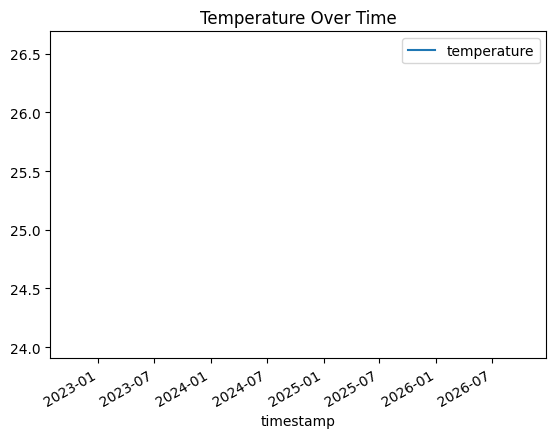

In [15]:
import matplotlib.pyplot as plt

# Convert 'timestamp' to datetime
weather_data['timestamp'] = pd.to_datetime(weather_data['timestamp'])

# Plot temperature trends over time
weather_data.plot(x='timestamp', y='temperature', kind='line', title='Temperature Over Time')

# Show the plot
plt.show()


In [14]:
print(weather_data.columns)


Index(['city', 'temperature', 'humidity', 'wind_speed', 'timestamp'], dtype='object')
